# CODSOFT

# TASK 1  ((MOVIE GENRE CLASSIFICATION))

Create a machine learning model that can predict the genre of a
movie based on its plot summary or other textual information. You
can use techniques like TF-IDF or word embeddings with classifiers
such as Naive Bayes, Logistic Regression, or Support Vector
Machines.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from collections import Counter
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score, classification_report
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

C:\Users\hp\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#data = pd.read_table("train_data.txt", delimiter=":::") #
data = pd.read_csv("train_data.txt" , sep=":::" , header=None , index_col=0 , 
                   names=["ID", "TITLE" , "GENRE" , "DESCRIPTION"] , engine='python')
data.head()

,TITLE,GENRE,DESCRIPTION
ID,,,
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54214 entries, 1 to 54214
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   TITLE        54214 non-null  object
 1   GENRE        54214 non-null  object
 2   DESCRIPTION  54214 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB


In [4]:
data.isnull().sum()

TITLE          0
GENRE          0
DESCRIPTION    0
dtype: int64

In [5]:
data.duplicated().sum()

0

In [6]:
# number of classes
data["GENRE"].nunique()

27

In [7]:
# the name of classes
pd.unique(data["GENRE"])

array([' drama ', ' thriller ', ' adult ', ' documentary ', ' comedy ',
       ' crime ', ' reality-tv ', ' horror ', ' sport ', ' animation ',
       ' action ', ' fantasy ', ' short ', ' sci-fi ', ' music ',
       ' adventure ', ' talk-show ', ' western ', ' family ', ' mystery ',
       ' history ', ' news ', ' biography ', ' romance ', ' game-show ',
       ' musical ', ' war '], dtype=object)

In [8]:
data["GENRE"].value_counts()

 drama           13613
 documentary     13096
 comedy           7447
 short            5073
 horror           2204
 thriller         1591
 action           1315
 western          1032
 reality-tv        884
 family            784
 adventure         775
 music             731
 romance           672
 sci-fi            647
 adult             590
 crime             505
 animation         498
 sport             432
 talk-show         391
 fantasy           323
 mystery           319
 musical           277
 biography         265
 history           243
 game-show         194
 news              181
 war               132
Name: GENRE, dtype: int64

In [9]:
data.describe()

,TITLE,GENRE,DESCRIPTION
count,54214,54214,54214
unique,54214,27,54086
top,Oscar et la dame rose (2009),drama,Grammy - music award of the American academy ...
freq,1,13613,12


Text(0.5, 1.0, 'Genre Distribution')

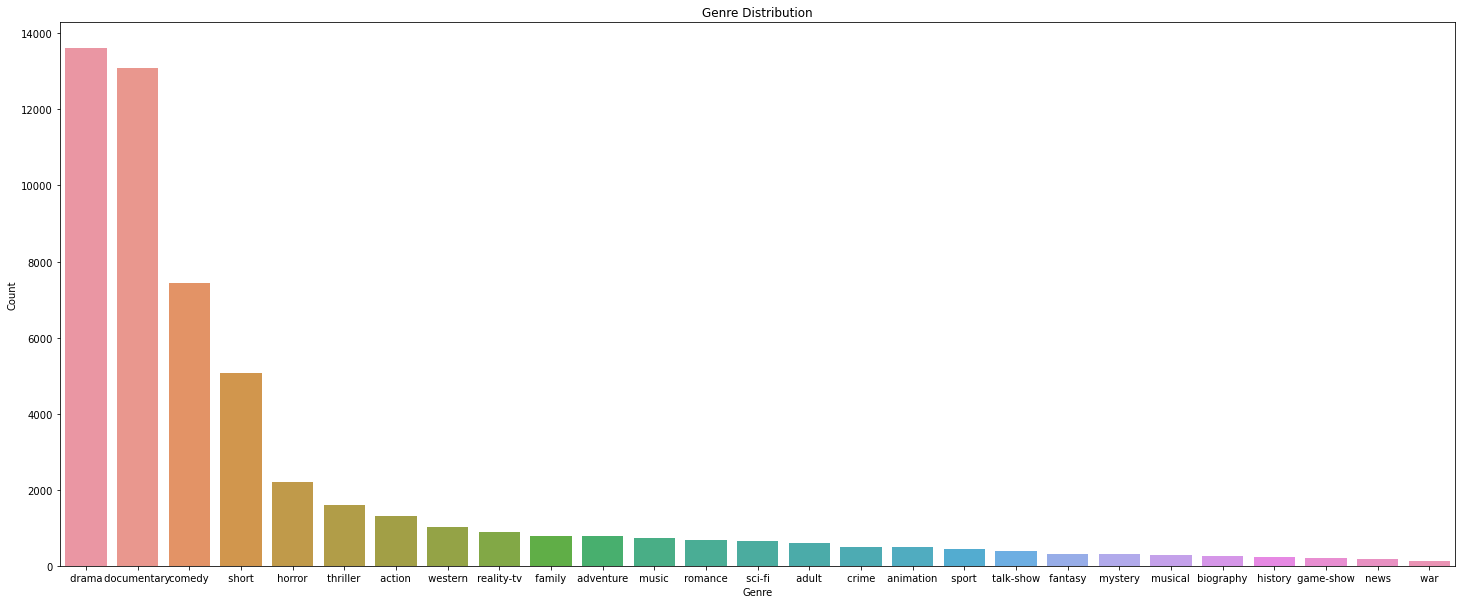

In [10]:
plt.figure(figsize=(25, 10))
genre_counts = data["GENRE"].value_counts()
#genre_counts.plot(kind="bar")
sns.barplot(x=genre_counts.index, y=genre_counts)
plt.xlabel("Genre")
plt.ylabel("Count")
plt.title("Genre Distribution")

In [11]:
#data = pd.read_table("train_data.txt", delimiter=":::") #
data_test = pd.read_csv("test_data_solution.txt" , sep=":::" , header=None , index_col=0 , 
                   names=["ID", "TITLE" ,"GENRE" ,  "DESCRIPTION"] , engine='python')
data_test.head()

,TITLE,GENRE,DESCRIPTION
ID,,,
1,Edgar's Lunch (1998),thriller,"L.R. Brane loves his life - his car, his apar..."
2,La guerra de papá (1977),comedy,"Spain, March 1964: Quico is a very naughty ch..."
3,Off the Beaten Track (2010),documentary,One year in the life of Albin and his family ...
4,Meu Amigo Hindu (2015),drama,"His father has died, he hasn't spoken with hi..."
5,Er nu zhai (1955),drama,Before he was known internationally as a mart...


In [12]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54200 entries, 1 to 54200
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   TITLE        54200 non-null  object
 1   GENRE        54200 non-null  object
 2   DESCRIPTION  54200 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB


In [13]:
data.isnull().sum()


TITLE          0
GENRE          0
DESCRIPTION    0
dtype: int64

In [14]:
data.duplicated().sum()


0

In [15]:
# number of classes
data["GENRE"].nunique()

27

In [16]:
data_test.describe()

,TITLE,GENRE,DESCRIPTION
count,54200,54200,54200
unique,54200,27,54072
top,Edgar's Lunch (1998),drama,Grammy - music award of the American academy ...
freq,1,13612,10


In [17]:
data['length']=data['DESCRIPTION'].apply(len)
data.head()

,TITLE,GENRE,DESCRIPTION,length
ID,,,,
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,546
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...,184
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,650
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,1082
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,625


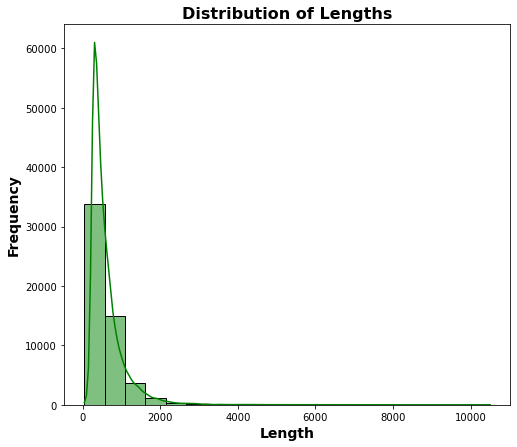

In [18]:
plt.figure(figsize=(8, 7))
#Add a kernel density estimate[[kde]]to smooth the histogram, providing complementary information about the shape of the distribution
sns.histplot(data=data, x='length' , bins=20, kde=True, color='green')
plt.xlabel('Length', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')
plt.title('Distribution of Lengths', fontsize=16, fontweight='bold')

plt.show()

# Data cleaning and preprocessing

#detecting language of all the descriptions in training and testing datasets
from langdetect import detect, DetectorFactory
def detect_language(text):
    #To enforce consistent results, call following code before the first language detection
    DetectorFactory.seed = 0 
    languge = detect(text)
    return languge

data['language'] = data['DESCRIPTION'].apply(detect_language)
data_test['language'] = data_test['DESCRIPTION'].apply(detect_language)

data = data.drop(["language"] != "en" , axis = 0) # to remove any raw not english languge
data.head()

In [19]:
"""Stop Words: A stop word is a commonly used word (such as “the”, “a”, “an”, “in”)
that a search engine has been programmed to ignore, 
both when indexing entries for searching and when 
retrieving them as the result of a search query. """


stop_words = set(stopwords.words('english'))
stemmer = LancasterStemmer()

In [20]:
def clean_text(text):
   
    text = text.lower()                                  # lower-case all characters
    text = re.sub('-',' ',text.lower())   # replace `word-word` as `word word`
    text = re.sub(f'[{string.digits}]',' ',text)  # remove digits
    text = ' '.join([stemmer.stem(word) for word in text.split() if word not in stop_words])  # remove stopwords and stem other words
    text =  re.sub(r'@\S+', '',text)                     # remove twitter handles
    text =  re.sub(r'http\S+', '',text)                  # remove urls
    text =  re.sub(r'pic.\S+', '',text) 
    text =  re.sub(r"[^a-zA-Z+']", ' ',text)             # only keeps characters
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text+' ')      # keep words with length>1 only
    text = "".join([i for i in text if i not in string.punctuation])
    words = nltk.tokenize.word_tokenize(text,language="english", preserve_line=True)
    stopwords = nltk.corpus.stopwords.words('english')   # remove stopwords
    text = " ".join([i for i in words if i not in stopwords and len(i)>2])
    text= re.sub("\s[\s]+", " ",text).strip()            # remove repeated/leading/trailing spaces
    return re.sub(f'[{re.escape(string.punctuation)}]','',text) # remove punctuations


# Test your cleaning function
input_text = "Certainly you get a dramatic boost from hello bye the the hi -iv iem-k q934*2yee !*3 2e38"
print(f'Original text: {input_text}')
print(f'Cleaned text: {clean_text(input_text)}')

Original text: Certainly you get a dramatic boost from hello bye the the hi -iv iem-k q934*2yee !*3 2e38
Cleaned text: certain get dram boost hello bye iem


In [21]:
data['Text_cleaning'] = data.DESCRIPTION.apply(clean_text)
data_test['Text_cleaning'] = data_test.DESCRIPTION.apply(clean_text)

data.head()

,TITLE,GENRE,DESCRIPTION,length,Text_cleaning
ID,,,,,
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,546,list convers doct parents year old osc learn n...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...,184,broth sist past incestu rel cur murd relations...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,650,bus empty stud field trip muse nat history lit...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,1082,help unemploy fath mak end meet edi twin sist ...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,625,films titl ref recov body ground zero also sta...


In [22]:
data['length_Text_cleaning'] = data['Text_cleaning'].apply(len)
data.head()

,TITLE,GENRE,DESCRIPTION,length,Text_cleaning,length_Text_cleaning
ID,,,,,,
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,546,list convers doct parents year old osc learn n...,324
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...,184,broth sist past incestu rel cur murd relations...,83
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,650,bus empty stud field trip muse nat history lit...,325
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,1082,help unemploy fath mak end meet edi twin sist ...,616
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,625,films titl ref recov body ground zero also sta...,282


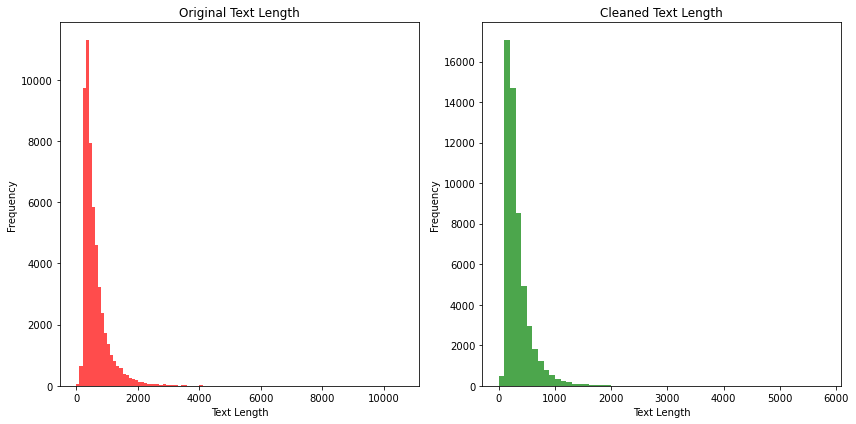

In [23]:
# Create histograms for text length before and after cleaning
plt.figure(figsize=(12, 6))

# Original text length distribution
plt.subplot(1, 2, 1)
original_lengths = data['DESCRIPTION'].apply(len)
plt.hist(original_lengths, bins=range(0, max(original_lengths) + 100, 100), color='red', alpha=0.7)
plt.title('Original Text Length')
plt.xlabel('Text Length')
plt.ylabel('Frequency')

# Cleaned text length distribution
plt.subplot(1, 2, 2)
cleaned_lengths = data['Text_cleaning'].apply(len)
plt.hist(cleaned_lengths, bins=range(0, max(cleaned_lengths) + 100, 100), color='green', alpha=0.7)
plt.title('Cleaned Text Length')
plt.xlabel('Text Length')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [24]:
outliers=data['length_Text_cleaning']>2000
outliers

ID
1        False
2        False
3        False
4        False
5        False
         ...  
54210    False
54211    False
54212    False
54213    False
54214    False
Name: length_Text_cleaning, Length: 54214, dtype: bool

In [25]:
(data['length_Text_cleaning']>2000).value_counts()

False    54131
True        83
Name: length_Text_cleaning, dtype: int64

In [26]:
#Remove extremely long descriptions: outliers
data.drop(data[outliers].index,axis=0,inplace=True)     # filter rows having cleaned description length > 2000
print('Dataframe size (after removal): ',len(data))
print(f'Removed rows: {outliers.sum()}')

Dataframe size (after removal):  54131
Removed rows: 83


<AxesSubplot:xlabel='GENRE', ylabel='length'>

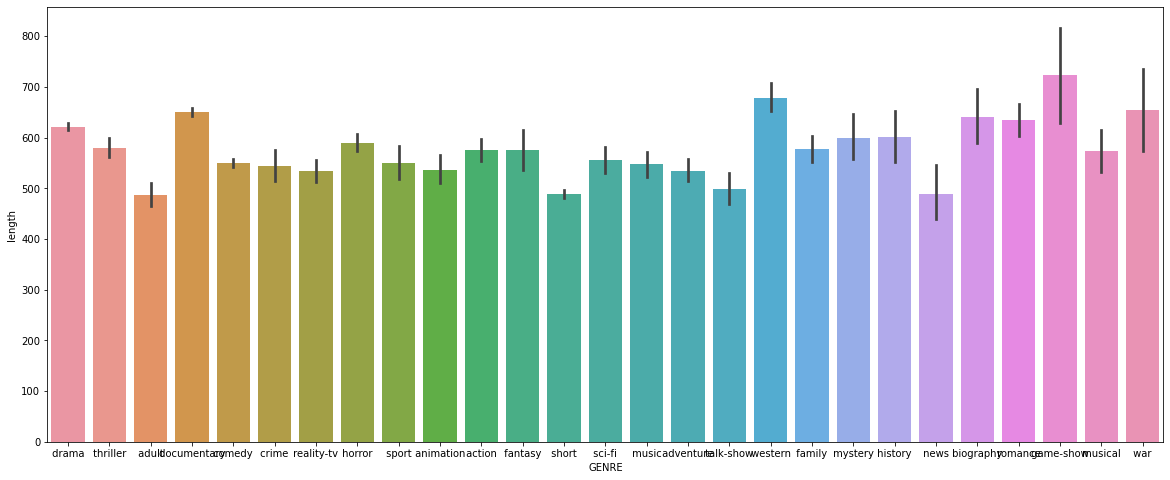

In [27]:
# before the cleaned.
plt.figure(figsize=(20,8))
sns.barplot(x='GENRE',y='length',data=data)

<AxesSubplot:xlabel='GENRE', ylabel='length_Text_cleaning'>

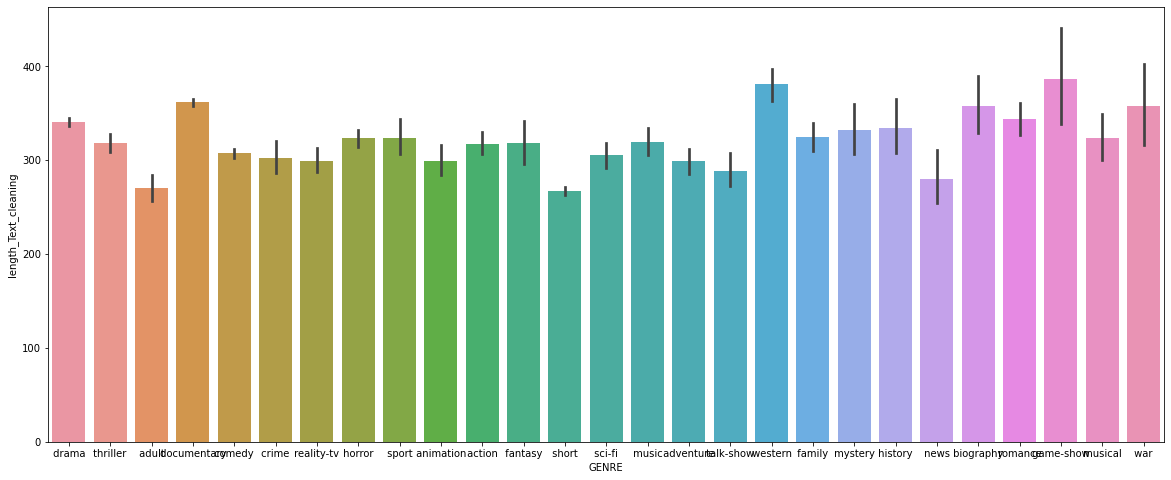

In [28]:
# after cleaned
plt.figure(figsize=(20,8))
sns.barplot(x='GENRE',y='length_Text_cleaning',data=data)

In [29]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(data["GENRE"])
le.classes_

array([' action ', ' adult ', ' adventure ', ' animation ', ' biography ',
       ' comedy ', ' crime ', ' documentary ', ' drama ', ' family ',
       ' fantasy ', ' game-show ', ' history ', ' horror ', ' music ',
       ' musical ', ' mystery ', ' news ', ' reality-tv ', ' romance ',
       ' sci-fi ', ' short ', ' sport ', ' talk-show ', ' thriller ',
       ' war ', ' western '], dtype=object)

In [30]:
genre = le.transform(data["GENRE"])
genre

array([ 8, 24,  1, ...,  7,  5, 12])

In [31]:
genretest = le.transform(data_test["GENRE"])
genretest

array([24,  5,  7, ...,  1,  8,  8])

In [32]:
data_test["GENRE"] = genretest
data_test.head()

,TITLE,GENRE,DESCRIPTION,Text_cleaning
ID,,,,
1,Edgar's Lunch (1998),24,"L.R. Brane loves his life - his car, his apar...",bran lov lif car apartment job espec girlfrien...
2,La guerra de papá (1977),5,"Spain, March 1964: Quico is a very naughty ch...",spain march quico naughty child three belong w...
3,Off the Beaten Track (2010),7,One year in the life of Albin and his family ...,year lif albin famy shepherd transylvania dire...
4,Meu Amigo Hindu (2015),8,"His father has died, he hasn't spoken with hi...",fath died spok broth year sery cancer diego ta...
5,Er nu zhai (1955),8,Before he was known internationally as a mart...,known intern mart art superstar bruc lee appea...


In [33]:
data["GENRE"] = genre
data.head()

,TITLE,GENRE,DESCRIPTION,length,Text_cleaning,length_Text_cleaning
ID,,,,,,
1,Oscar et la dame rose (2009),8,Listening in to a conversation between his do...,546,list convers doct parents year old osc learn n...,324
2,Cupid (1997),24,A brother and sister with a past incestuous r...,184,broth sist past incestu rel cur murd relations...,83
3,"Young, Wild and Wonderful (1980)",1,As the bus empties the students for their fie...,650,bus empty stud field trip muse nat history lit...,325
4,The Secret Sin (1915),8,To help their unemployed father make ends mee...,1082,help unemploy fath mak end meet edi twin sist ...,616
5,The Unrecovered (2007),8,The film's title refers not only to the un-re...,625,films titl ref recov body ground zero also sta...,282


In [34]:
X = data["Text_cleaning"]
Y = data["GENRE"]

In [35]:
X_test = data_test["Text_cleaning"]
Y_test = data["GENRE"]
Y_test

ID
1         8
2        24
3         1
4         8
5         8
         ..
54210     5
54211    13
54212     7
54213     5
54214    12
Name: GENRE, Length: 54131, dtype: int32

# Text Vectorization (TF-IDF)

In [36]:
# Create a TF-IDF vectorizer to convert text messages into numerical features

feature_tf_idf = TfidfVectorizer(lowercase=True, stop_words="english")

In [37]:
# Convert the training  messages into numerical features using TF-IDF

X = feature_tf_idf.fit_transform(X)

# Build and train model

In [38]:
# Split the data into training and testing sets

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 3)

In [39]:
# Create a logistic regression model and train it on the training data

model = LogisticRegression()
model.fit(X, Y)

LogisticRegression()

In [40]:
"""X_test = feature_tf_idf.fit_transform(X_test)
print(X_test)"""

'X_test = feature_tf_idf.fit_transform(X_test)\nprint(X_test)'

In [41]:
# Make predictions on the training data and calculate the accuracy

prediction_on_training_data = model.predict(X_test)
accuracy_on_training_data = accuracy_score(Y_test, prediction_on_training_data)

In [42]:
print("Accuracy on training data:",accuracy_on_training_data)

Accuracy on training data: 0.686062621224716


In [43]:
gnb = GaussianNB()
bnb = BernoulliNB()

In [44]:
bnb.fit(X, Y)

BernoulliNB()

In [45]:
y_pred =bnb.predict(X_test)
print("Accuracy: ",accuracy_score(y_pred,Y_test)*100,"%")
print("Weighted Avg Precision:", precision_score(y_pred, Y_test, average='weighted')*100,"%")
print(classification_report(y_pred,Y_test))

Accuracy:  55.86958529601921 %
Weighted Avg Precision: 84.76330866775048 %
              precision    recall  f1-score   support

           0       0.02      0.60      0.04        10
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.01      1.00      0.02         1
           4       0.00      0.00      0.00         0
           5       0.58      0.67      0.62      1311
           6       0.00      0.00      0.00         0
           7       0.92      0.60      0.73      3911
           8       0.90      0.48      0.63      5285
           9       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         0
          11       0.00      0.00      0.00         0
          12       0.00      0.00      0.00         0
          13       0.15      0.94      0.25        69
          14       0.01      1.00      0.03         2
          15       0.00      0.00      0.00         0
      

# model with Deep Learning

# Text tokenization and vectorization

In [46]:
num_words = 50000
max_len = 250
tokenizer = Tokenizer(num_words=num_words, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(data['Text_cleaning'].values)

# Text Vectorization (TF-IDF)

In [47]:
#Transforms each text in texts to a sequence of integers.
X = tokenizer.texts_to_sequences(data['Text_cleaning'].values)
#sequences (lists of integers) into a 2D Numpy array
X = pad_sequences(X, maxlen=max_len)
y = pd.get_dummies(data['GENRE']).values
#y = data['Labeled Genre']

X_test = tokenizer.texts_to_sequences(data_test['Text_cleaning'].values)
X_test = pad_sequences(X_test, maxlen=max_len)
y_test = pd.get_dummies(data_test['GENRE']).values
#y_test = data_test['Labeled Genre']

In [48]:
X

array([[   0,    0,    0, ..., 2186, 5598, 3216],
       [   0,    0,    0, ...,   26,    9,  221],
       [   0,    0,    0, ..., 1753,  626, 2149],
       ...,
       [   0,    0,    0, ..., 1111,   29, 7376],
       [   0,    0,    0, ...,    6, 1715,  343],
       [   0,    0,    0, ...,  348,  242,  552]])

In [49]:
y

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [50]:
X_test

array([[    0,     0,     0, ...,    16,     6, 25879],
       [    0,     0,     0, ...,   215,  4251,    69],
       [    0,     0,     0, ...,   478,  1603,  6289],
       ...,
       [    0,     0,     0, ...,   187,     9,    42],
       [    0,     0,     0, ...,   279,    43,    53],
       [    0,     0,     0, ...,  3643,   236,  4237]])

In [51]:
y_test

array([[0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

X_train = X.tolist()
y_train = y.tolist()

from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score, classification_report
from sklearn.linear_model import LogisticRegression

gnb = GaussianNB()
bnb = BernoulliNB()
lg = LogisticRegression(multi_class='ovr')

gnb.fit(X_train, y_train)
bnb.fit(X_train, y_train)
lg.fit(X_train, y_train)

# Build the LSTM model

In [52]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, SpatialDropout1D
from tensorflow.keras.callbacks import EarlyStopping

EMBEDDING_DIM = 100
model = Sequential()
model.add(Embedding(num_words, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.1, recurrent_dropout=0.2))
model.add(Dense(27, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 250, 100)          5000000   
                                                                 
 spatial_dropout1d (Spatial  (None, 250, 100)          0         
 Dropout1D)                                                      
                                                                 
 lstm (LSTM)                 (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 27)                2727      
                                                                 
Total params: 5083127 (19.39 MB)
Trainable params: 5083127 (19.39 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Train the model

In [ ]:
callbacks  = [EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=2,
                              mode='auto')]
history = model.fit(X, y, epochs=6, batch_size=32,validation_data=(X_test,y_test), callbacks=callbacks)

Epoch 1/6
 860/1692 [==============>...............] - ETA: 25:41 - loss: 2.1327 - accuracy: 0.3740

In [ ]:
results = model.evaluate(X, y, verbose=0)
print("    Test Loss: {:.5f}".format(results[0]))
print("Test Accuracy: {:.2f}%".format(results[1] * 100))